In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt ## graficos

In [24]:
dados = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dados/desafio_01_preco_imoveis-230209-164627.csv')

In [25]:
# Função para remover outlier

def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

## **<font color=#HH8888> Exercício: Análise de correlação </font>**

---




Contexto: Para uma base de dados do setor imobiliário:

1 - Analise a correlacao de todas as variáveis com o preco do imóvel. Quais variaveis sao mais correlacionadas positivatemente? e negativamente? Quais sao menos correlacionadas? 

2 - Para as top 5 variáveis mais correlacionadas com o preco:
  1. Plote as suas distribuicoes (histograma e boxplot)
  2. Plote o scatterplot (gráfico de dispersao), contendo preco no eixo Y e a variável correlacionada no eixo X.

COLUNAS: 

*  id : código identificador do imóvel
*  date: data em que o imóvel foi cadastrado
*  price: preço do imóvel
*  bedrooms: número de quartos
*  bathrooms: número de banheiros
*  sqft_living: tamanho do imóvel (dentro da casa)
*  sqft_lot: tamanho do lote / terreno
*  floors: andares
*  waterfront: flag se o imóvel tem vista para o mar. 1 caso positivo, 0 caso
contrário.
*  view: indica o número de quartos com vista.
*  condition: condição do imóvel, escala de 1 a 5
*  grade: nota do imóvel
*  sqft_above: tamanho da casa acima do solo (excluindo porão)
*  sqft_basement: tamanho do porão
*  yr_built: ano em que a casa foi construída
*  yr_renovated: ano em que a casa foi renovada
*  zipcode: "CEP" do imóvel
*  lat: latitude do imóvel
*  long: longitude do imóvel


In [26]:
dados.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045


In [27]:
dados.describe().round(3)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
count,2.161300e+04,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000
mean,4.580302e+09,540088.142,3.371,2.115,2079.900,15106.968,1.494,0.008,0.234,3.409,7.657,1788.391,291.509,1971.005,84.402,98077.940,47.560,-122.214
std,2.876566e+09,367127.196,0.930,0.770,918.441,41420.512,0.540,0.087,0.766,0.651,1.175,828.091,442.575,29.373,401.679,53.505,0.139,0.141
min,1.000102e+06,75000.000,0.000,0.000,290.000,520.000,1.000,0.000,0.000,1.000,1.000,290.000,0.000,1900.000,0.000,98001.000,47.156,-122.519
25%,2.123049e+09,321950.000,3.000,1.750,1427.000,5040.000,1.000,0.000,0.000,3.000,7.000,1190.000,0.000,1951.000,0.000,98033.000,47.471,-122.328
50%,3.904930e+09,450000.000,3.000,2.250,1910.000,7618.000,1.500,0.000,0.000,3.000,7.000,1560.000,0.000,1975.000,0.000,98065.000,47.572,-122.230
75%,7.308900e+09,645000.000,4.000,2.500,2550.000,10688.000,2.000,0.000,0.000,4.000,8.000,2210.000,560.000,1997.000,0.000,98118.000,47.678,-122.125
max,9.900000e+09,7700000.000,33.000,8.000,13540.000,1651359.000,3.500,1.000,4.000,5.000,13.000,9410.000,4820.000,2015.000,2015.000,98199.000,47.778,-121.315


# 1 - Analise a correlação de todas as variáveis com o preço do imóvel. Quais variáveis são mais correlacionadas? Quais são menos correlacionadas?

In [28]:
corr = dados.corr()
corr.style.background_gradient(cmap='coolwarm')

<ipython-input-28-03ce53eaf002>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = dados.corr()


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
id,1.000000,-0.016762,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,-0.023783,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799
price,-0.016762,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626
bedrooms,0.001286,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473
bathrooms,0.005160,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042
sqft_living,-0.012258,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223
sqft_lot,-0.132109,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521
floors,0.018525,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419
waterfront,-0.002721,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910
view,0.011592,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400
condition,-0.023783,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500


In [29]:
corr["price"].sort_values(ascending = False)

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
yr_built         0.054012
condition        0.036362
long             0.021626
id              -0.016762
zipcode         -0.053203
Name: price, dtype: float64

##### Mais correlacionadas::
* sqft_living,
* grade,
* sqft_above,
* bathrooms,
* view.

##### Menos correlacionadas:
* id
* zipcode
* long
* condition
* yr_built.

# 2 - Para as top 5 variáveis mais correlacionadas com o preço:



### 2.1 - Plote as suas distribuições (histograma e boxplot)

Tamanho do imóvel (dentro da casa)

Text(0.5, 1.0, 'Boxplot sqft_living')

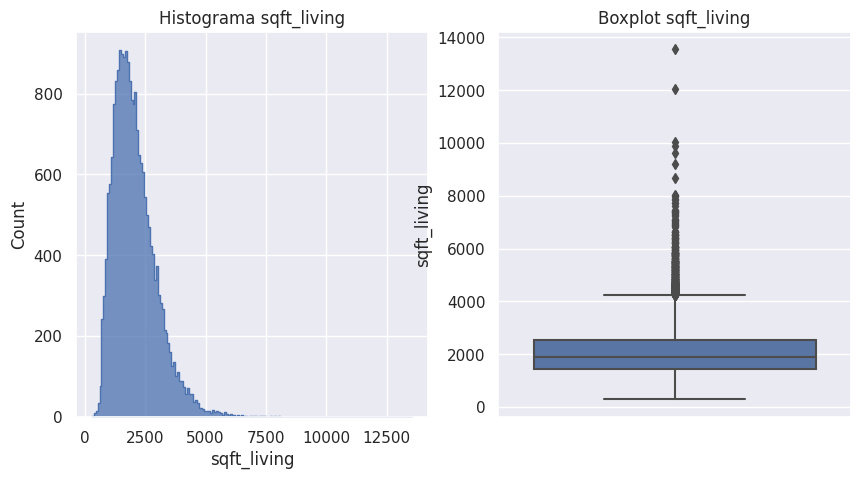

In [30]:
fig, ax =plt.subplots(1,2)
sns.set(rc={'figure.figsize':(10,5)})
sns.histplot(data=dados, x="sqft_living", element="step", ax = ax[0]).set_title("Histograma sqft_living")
sns.boxplot( y="sqft_living", data=dados, ax= ax[1]).set_title("Boxplot sqft_living")

Tamanho do imóvel (dentro da casa) - Remoção de outliers - teste

In [22]:
dados_ro = remove_outlier(dados, 'sqft_living')

Text(0.5, 1.0, 'Boxplot sqft_living sem outliers')

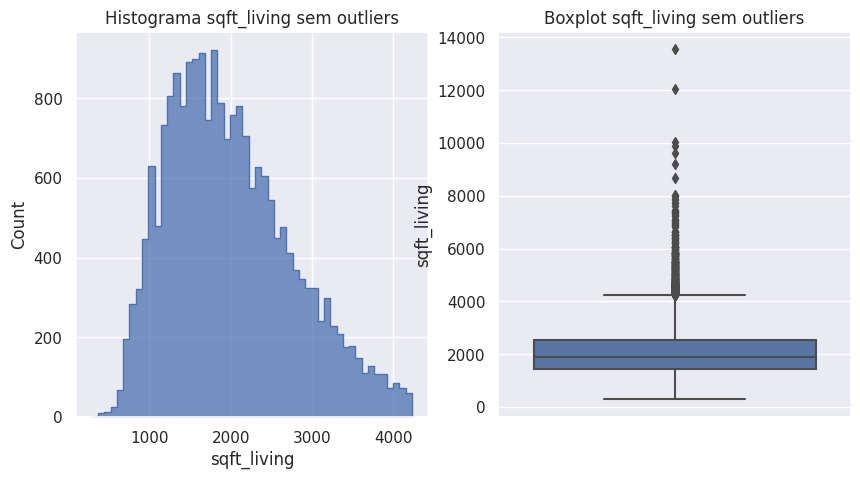

In [31]:
fig, ax =plt.subplots(1,2)
sns.set(rc={'figure.figsize':(10,5)})
sns.histplot(data=dados_ro, x="sqft_living", element="step", ax = ax[0]).set_title("Histograma sqft_living sem outliers")
sns.boxplot( y="sqft_living", data=dados, ax= ax[1]).set_title("Boxplot sqft_living sem outliers")

Nota do Imóvel

Text(0.5, 1.0, 'Boxplot grade')

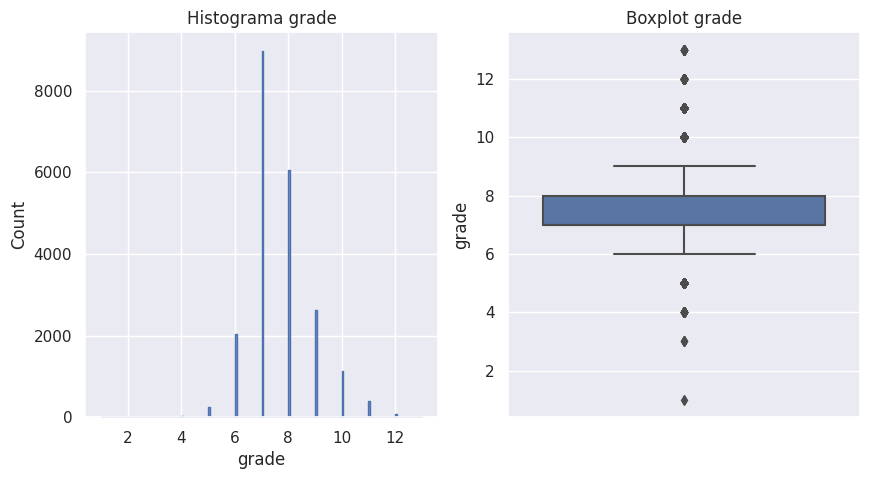

In [32]:
fig, ax =plt.subplots(1,2)
sns.set(rc={'figure.figsize':(10,5)})
sns.histplot(data=dados, x="grade", element="step", ax = ax[0]).set_title("Histograma grade")
sns.boxplot( y="grade", data=dados, ax= ax[1]).set_title("Boxplot grade")

Tamanho da casa acima do solo (excluindo porão)

Text(0.5, 1.0, 'Boxplot sqft_above')

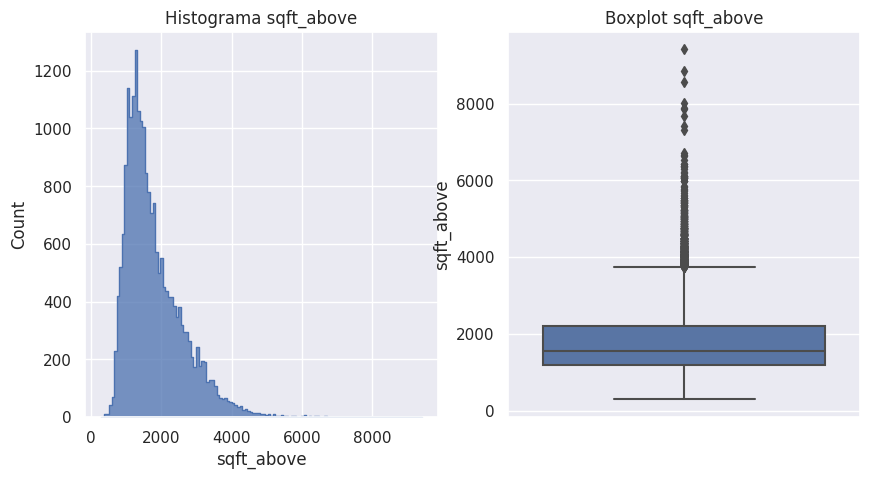

In [33]:
fig, ax =plt.subplots(1,2)
sns.set(rc={'figure.figsize':(10,5)})
sns.histplot(data=dados, x="sqft_above", element="step", ax = ax[0]).set_title("Histograma sqft_above")
sns.boxplot( y="sqft_above", data=dados, ax= ax[1]).set_title("Boxplot sqft_above")

Quantidade de banheiros

Text(0.5, 1.0, 'Boxplot bathrooms')

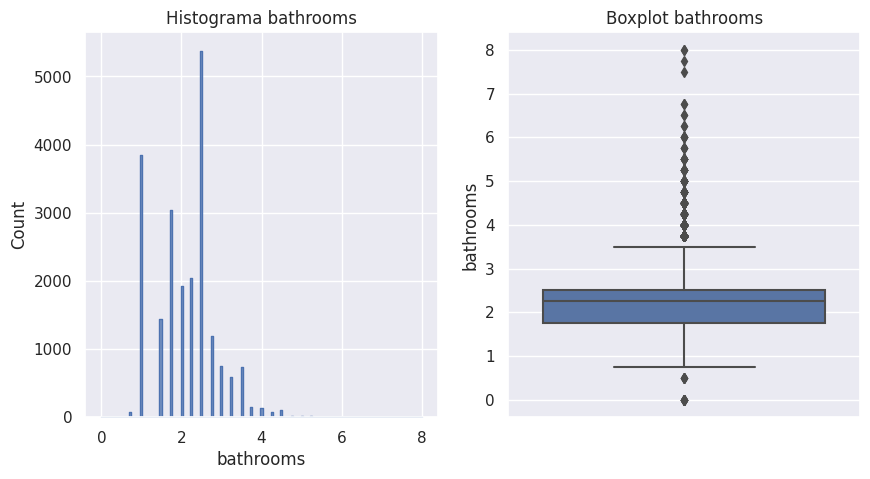

In [34]:
fig, ax =plt.subplots(1,2)
sns.set(rc={'figure.figsize':(10,5)})
sns.histplot(data=dados, x="bathrooms", element="step", ax = ax[0]).set_title("Histograma bathrooms")
sns.boxplot( y="bathrooms", data=dados, ax= ax[1]).set_title("Boxplot bathrooms")

Indica o número de quartos com vista:

Text(0.5, 1.0, 'Boxplot view')

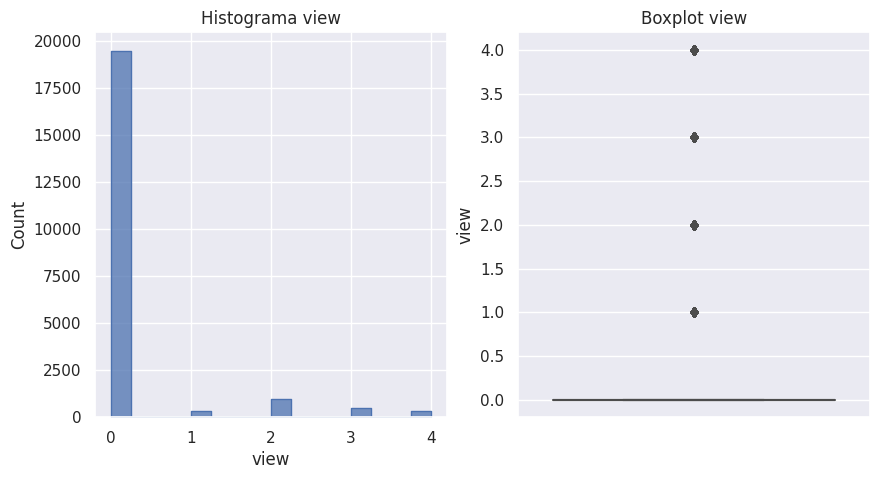

In [35]:
fig, ax =plt.subplots(1,2)
sns.set(rc={'figure.figsize':(10,5)})
sns.histplot(data=dados, x="view", element="step", ax = ax[0]).set_title("Histograma view")
sns.boxplot( y="view", data=dados, ax= ax[1]).set_title("Boxplot view")

Valor do Imóvel:

Text(0.5, 1.0, 'Boxplot Price')

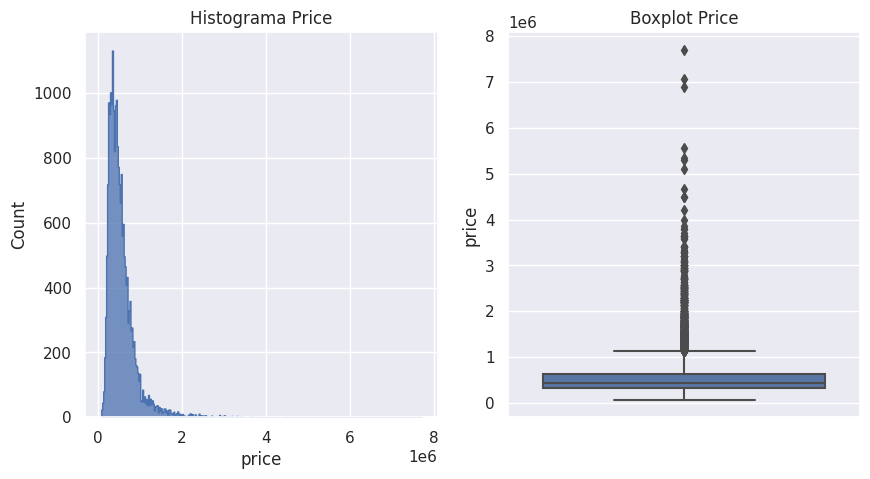

In [36]:
fig, ax =plt.subplots(1,2)
sns.set(rc={'figure.figsize':(10,5)})
sns.histplot(data=dados, x="price", element="step", ax = ax[0]).set_title("Histograma Price")
sns.boxplot( y="price", data=dados, ax= ax[1]).set_title("Boxplot Price")

### 2.2 - Plote o scatterplot (gráfico de dispersão), contendo preço no eixo Y e a variável correlacionada no eixo X.


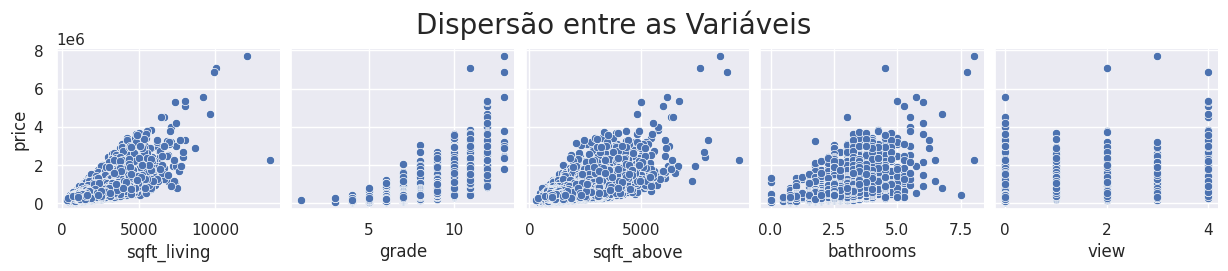

In [37]:
ax = sns.pairplot(dados, y_vars='price', x_vars=["sqft_living" , "grade" , "sqft_above" , "bathrooms" , "view"])
ax.fig.suptitle('Dispersão entre as Variáveis', fontsize=20, y=1.05)
ax

Limpeza de Outliers e Normalização:
- Utilizamos a normalizacao geralmente quando temos variáveis com escalas muito diferentes e/ou quando temos variáveis com distribuicao diferente de normal, e isso é um pressuposto do modelo em questao. 
- Outliers: devemos tirar quando
  1. Altera o resultado da regressão (rodar com e sem e comparar o resultado)
  2. Cria uma relação que nao existe nos dados
  3. Quando gera um viés na sua regressão

https://humansofdata.atlan.com/2018/03/when-delete-outliers-dataset/#:~:text=If%20the%20outlier%20creates%20a,the%20basis%20for%20your%20results.v